In [12]:
%matplotlib inline
from findatapy.market import Market, MarketDataRequest, MarketDataGenerator

In [13]:
from findatapy.util.dataconstants import DataConstants

# Yahoo data 

In [14]:
market = Market(market_data_generator=MarketDataGenerator())

In [15]:

md_request = MarketDataRequest(
        start_date="decade",            # start date
        data_source='yahoo',            # use yahoo as data source
        tickers=['apple'],               # ticker (findatapy)
        fields=['close'],               # which fields to download
        vendor_tickers=['AAPL'],        # ticker (yahoo)
        vendor_fields=['Close'])        # which Yahoo fields to download)



In [16]:
df = market.fetch_market(md_request)

2024-11-09 16:46:19,996 - findatapy.market.datavendorweb - INFO - Request Yahoo data


[*********************100%***********************]  1 of 1 completed

2024-11-09 16:46:20,160 - findatapy.market.datavendorweb - INFO - Completed request from Yahoo.


2024-11-09 16:46:22,200 - findatapy.market.ioengine - WARNING - Could not push MarketDataRequest_1021__abstract_curve_key-None__arcticdb_dict-{'prune_previous_versions': False, 'write_style': 'write', 'force_create_library': Fal... to Redis: Error 10061 connecting to 127.0.0.1:6379. No connection could be made because the target machine actively refused it.


In [17]:
df

,apple.close
Date,
2014-11-13 00:00:00+00:00,28.205000
2014-11-14 00:00:00+00:00,28.545000
2014-11-17 00:00:00+00:00,28.497499
2014-11-18 00:00:00+00:00,28.867500
2014-11-19 00:00:00+00:00,28.667500
...,...
2024-11-04 00:00:00+00:00,222.009995
2024-11-05 00:00:00+00:00,223.449997
2024-11-06 00:00:00+00:00,222.720001


<Axes: xlabel='Date'>

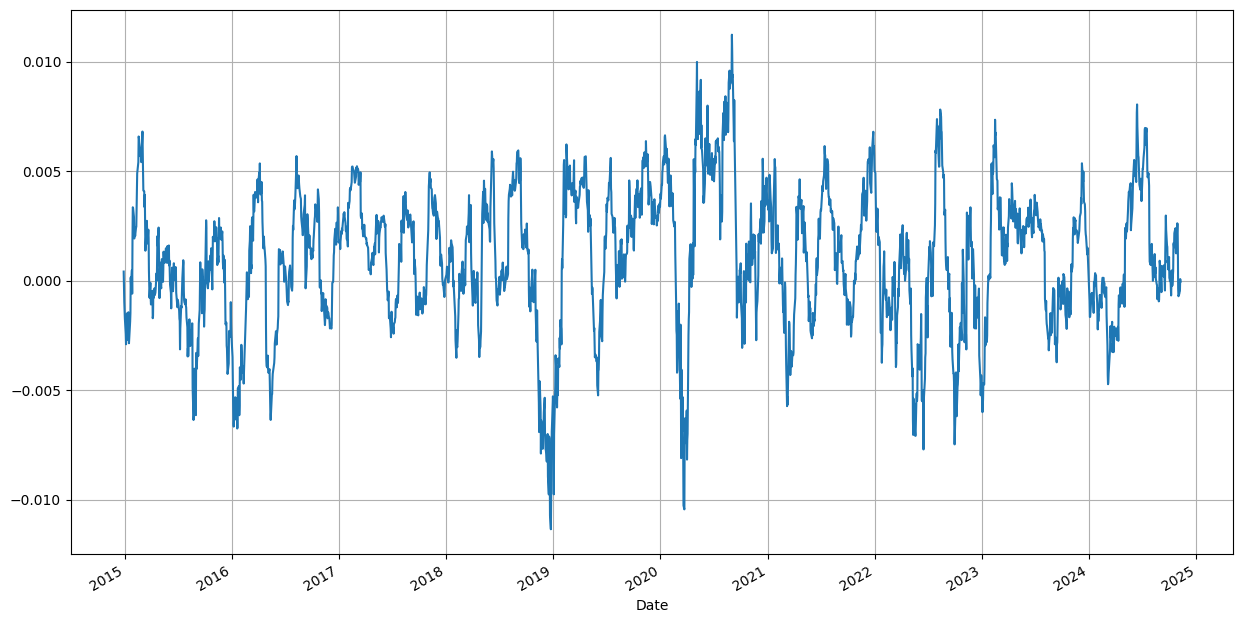

In [18]:
df['apple.close'].pct_change().rolling(30).mean().plot(grid=True, figsize=(15,8))

# Quandl

In [19]:
market = Market(market_data_generator=MarketDataGenerator())

In [20]:
md_request = MarketDataRequest(
        start_date="decade",            # start date
        data_source='quandl',     # use Bloomberg as data source
        tickers=['APPL'], # ticker (findatapy)
        fields=['close'],               # which fields to download
        vendor_tickers=['APPL'],   # ticker (Alpha Vantage)
        vendor_fields=['Close'])        # which Bloomberg fields to download)

In [21]:
df = market.fetch_market(md_request)

2024-11-09 16:46:22,625 - findatapy.market.datavendorweb - INFO - Request Quandl data
2024-11-09 16:46:22,629 - findatapy.market.datavendorweb - ERROR - The tickers ['APPL'] do not exist on Quandl.
2024-11-09 16:46:22,632 - findatapy.market.marketdatagenerator - WARNING - No data returned for ['APPL']


In [22]:
df.tail()

AttributeError: 'NoneType' object has no attribute 'tail'

# boe

In [ ]:
import datetime
boe_url = "http://www.bankofengland.co.uk/boeapps/iadb/fromshowcolumns.asp?csv.x=yes&Datefrom={start_date}&Dateto={end_date}&SeriesCodes={tickers}&CSVF=TN&UsingCodes=Y&VPD=Y&VFD=N"
start_time = datetime.date(2010, 1, 7).strftime("%d/%b/%Y")
end_time = datetime.date(2019, 10, 22).strftime("%d/%b/%Y")

In [ ]:
import pandas as pd
pd.read_csv(boe_url.format(start_date=start_time, end_date=end_time,tickers='IUMBV34,IUMBV37,IUMBV42,IUMBV45'))

,DATE,IUMBV34,IUMBV37,IUMBV42,IUMBV45
0,31 Jan 2010,3.97,4.64,5.56,..
1,28 Feb 2010,3.88,4.68,5.50,..
2,31 Mar 2010,3.92,4.68,5.50,..
3,30 Apr 2010,3.82,4.65,5.50,..
4,31 May 2010,3.78,4.56,5.38,..
...,...,...,...,...,...
112,31 May 2019,1.65,1.79,1.99,2.57
113,30 Jun 2019,1.64,1.77,1.97,2.59
114,31 Jul 2019,1.63,1.76,1.94,2.6
115,31 Aug 2019,1.61,1.74,1.90,2.62


In [ ]:
#%load_ext autoreload
%autoreload 2
from findatapy.market.datavendorweb import DataVendorYahoo, DataVendorBOE

In [ ]:
md_request = MarketDataRequest(
        start_date="decade",            # start date
        data_source='boe',     # use Bloomberg as data source
        tickers=['IUMBV34', 'IUMBV37'], # ticker (findatapy)
        fields=['close'],               # which fields to download
        vendor_tickers=['IUMBV34', 'IUMBV37'],   # ticker (Alpha Vantage)
        vendor_fields=['Close'])        # which Bloomberg fields to download)

In [ ]:
boe = DataVendorBOE()

In [ ]:
boe.load_ticker(md_request)

2019-11-02 14:07:43,529 - findatapy.market.datavendorweb - INFO - Request BOE data
2019-11-02 14:07:44,722 - findatapy.market.datavendorweb - INFO - Completed request from BOE.


,IUMBV34.close,IUMBV37.close
Date,,
30 Nov 2009,4.10,4.88
31 Dec 2009,4.05,4.84
31 Jan 2010,3.97,4.64
28 Feb 2010,3.88,4.68
31 Mar 2010,3.92,4.68
...,...,...
31 May 2019,1.65,1.79
30 Jun 2019,1.64,1.77
31 Jul 2019,1.63,1.76


In [ ]:
md_request.vendor_fields * 5

['Close', 'Close', 'Close', 'Close', 'Close']

# ONS 

In [ ]:
import requests, json

In [ ]:
payload = {
    "dataset": {
        "id": "cpih01",
        "edition": "time-series",
        "version": "6"
    },
    "dimensions": [
        {
            "name": "geography",
            "options": [
                "K02000001"
            ]
        }
    ]
}

In [ ]:
base_url = "https://api.beta.ons.gov.uk/v1"

In [ ]:
requests.get(base_url, params=payload)

<Response [404]>